<a href="https://colab.research.google.com/github/MSGanga/MSGanga/blob/main/Resume_Screening_NLP_Project_Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Resume Screening with Python

In [61]:
# Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Loading the dataset.
df = pd.read_csv('/content/resume_dataset.csv', encoding='utf-8')
# Creating a new empty column structured_resume.
df['structured_resume'] = ''
df.head()

,Category,Resume,structured_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [63]:
# Shape of the dataframe df.
df.shape

(962, 3)

In [64]:
# Information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Category           962 non-null    object
 1   Resume             962 non-null    object
 2   structured_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [65]:
# Printing the unique categories presented in the resumes.
print("Displaying the unique values in categories column ")
print(df['Category'].unique())

Displaying the unique values in categories column 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [66]:
# Printing the unique categories of resume and number of records present.
print ("Displaying the unique categories in resume and the number of records in each category")
cat=df['Category'].value_counts()
print(cat)

Displaying the unique categories in resume and the number of records in each category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


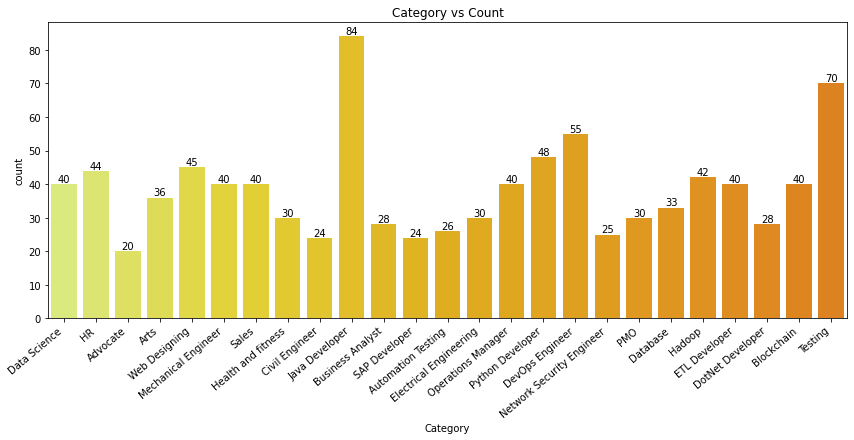

In [67]:
# Bargraph between Categories vs count
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Category", data=df, palette="Wistia")
for i in ax.patches:
    ax.annotate(str(i.get_height()),xy=(i.get_x()+i.get_width()/2,i.get_height()),
                ha="center", va="bottom")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Category vs Count")
plt.show()

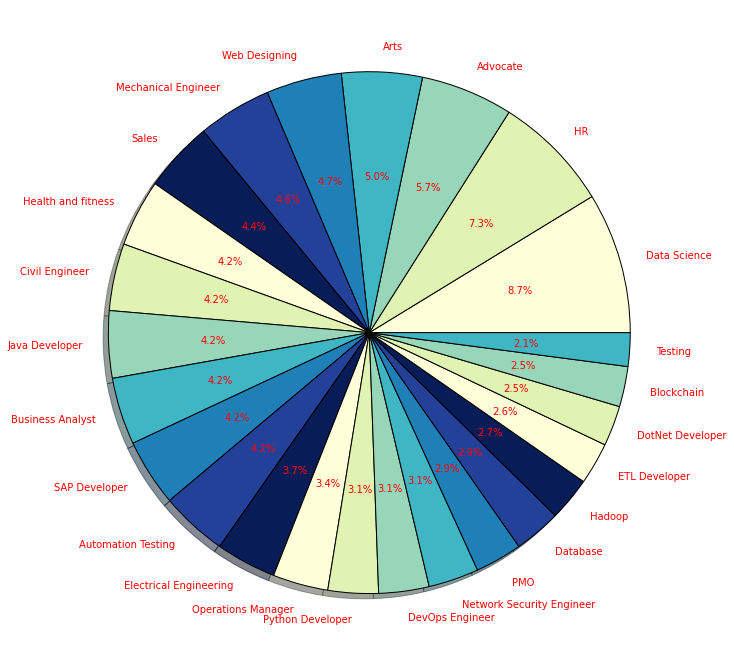

In [68]:
# Piechart showing category distribution.
targetCount = df['Category'].value_counts()
targetLabel  = df['Category'].unique()

plt.figure(figsize=(12,12))
cmap = plt.get_cmap('YlGnBu')
colors = [cmap(i) for i in np.linspace(0, 1, 7)]
plt.pie(targetCount, labels=targetLabel,autopct='%1.1f%%', 
        shadow=True, colors=colors, wedgeprops={"ec":"k"}, textprops={"color":"r"})
plt.show()

In [69]:
# First item of 'Resume' column in dataframe
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [70]:
# Last item of 'Resume' column in dataframe
df['Resume'][961]

'Skill Set OS Windows XP/7/8/8.1/10 Database MYSQL, sql server 2005, 2008 & 2012 Languages Core Java Web Technology HTML, CSS Testing Manual Testing, Database Testing Other Bug tracking and reporting, End user handling.Education Details \r\nJanuary 2016 MCS  Pune, Maharashtra P.V.P College Pravaranagar\r\nJanuary 2011 HSC   A.K.Junior College\r\nJanuary 2009 SSC   A.K.Mahavidyalya\r\nJR TESTING ENGINEER \r\n\r\nJR TESTING ENGINEER - M-Tech Innovations Ltd\r\nSkill Details \r\nTESTING- Exprience - 24 months\r\nWINDOWS XP- Exprience - 24 months\r\nCSS- Exprience - 6 months\r\nDATABASE- Exprience - 6 months\r\nDATABASE TESTING- Exprience - 6 monthsCompany Details \r\ncompany - M-Tech Innovations Ltd\r\ndescription - Responsibilities â\x80¢     Analyzing the Testing Requirements â\x80¢     Preparing Test Plans, Test Scenarios â\x80¢     Preparing Test Cases â\x80¢     Executing the test cases â\x80¢     Tracking bugs â\x80¢     Coordinating developers in order to fix it â\x80¢     Preparin

In [71]:
#importing re library
import re
#Function for cleaning Resume
def clean_resume(Text):
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs in the text (\s --> Matches whitespace)
    Text = re.sub('@\S+', '  ', Text)  # remove mentions in the text (\S --> Matches nonwhitespace)
    Text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', Text)  # remove punctuations in the text
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc in the text
    Text = re.sub('#\S+', '', Text)  # remove hashtags in the text
    Text = re.sub(r'[^\x00-\x7f]',r' ',Text) 
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace in the text
    return Text
    
df['structured_resume'] = df['Resume'].apply(lambda x: clean_resume(x))

In [72]:
#Importing NLTK library
import nltk
from nltk.corpus import stopwords
import string
#Importing Wordcloud library
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
# Cleaning the sentences
set_of_stopWords = set(stopwords.words('english')+['``',"''"])
total_words =[]
resume_description = df['Resume'].values
cleaned_sentences = ""
for i in range(0,300):
    cleaned_text = clean_resume(resume_description[i])
    cleaned_sentences += cleaned_text
    word_token = nltk.word_tokenize(cleaned_text)
    for w in word_token:
        if w not in set_of_stopWords and w not in string.punctuation:
            total_words.append(w)

In [74]:
import itertools

# Finding the frequency of words
# nltk.FreqDist() --> frequency distribution used to record the frequency of each word type in the document(Here,list).
word_freqdist = nltk.FreqDist(total_words) # FreqDist runs on an list/array of tokens.

print("Dispalying just 10 items from the dictionary containing the frequency of the words:\n")
print(dict(itertools.islice(word_freqdist.items(), 10))) 

# Displaying the most common words i.e., words with highest counts
print("\n\nThe most common words with highest counts are:\n")
top50_common_words = word_freqdist.most_common(50)
print(top50_common_words )


Dispalying just 10 items from the dictionary containing the frequency of the words:

{'Skills': 123, 'Programming': 52, 'Languages': 31, 'Python': 156, 'pandas': 4, 'numpy': 4, 'scipy': 4, 'scikit': 12, 'learn': 37, 'matplotlib': 8}


The most common words with highest counts are:

[('Details', 909), ('Exprience', 819), ('company', 810), ('description', 732), ('months', 665), ('1', 510), ('6', 366), ('January', 342), ('year', 330), ('Project', 321), ('Maharashtra', 315), ('Skill', 314), ('sales', 305), ('project', 285), ('Education', 272), ('Less', 264), ('time', 249), ('team', 245), ('Engineering', 244), ('I', 244), ('data', 243), ('College', 238), ('Data', 216), ('Pune', 216), ('application', 203), ('monthsCompany', 202), ('Sales', 200), ('Web', 196), ('Science', 190), ('University', 189), ('Ltd', 181), ('B', 176), ('work', 176), ('C', 175), ('India', 174), ('A', 171), ('Responsibilities', 171), ('S', 169), ('SQL', 168), ('2', 166), ('Nagpur', 166), ('Management', 164), ('like', 164)

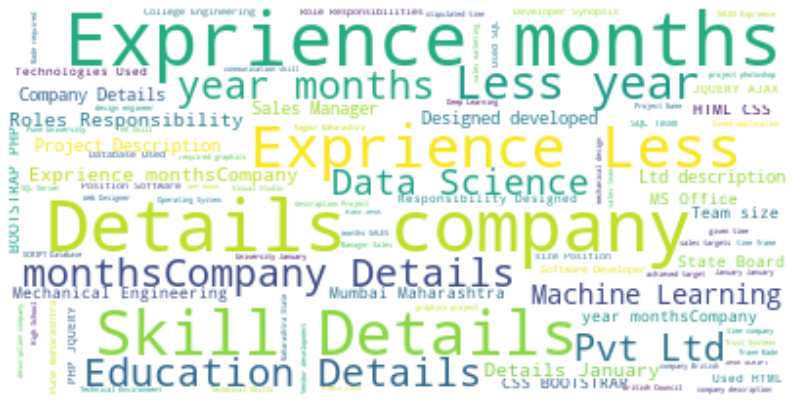

In [75]:
# Plotting the frequency of words using Wordcloud library
word_cloud = WordCloud(background_color="white").generate(cleaned_sentences)
plt.figure(figsize=(14,14))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [76]:
#Importing sklearn library
from sklearn.metrics import accuracy_score, classification_report
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder

In [77]:
# Converting words in to categorical values
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['Category']

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine learning algorithm for prediction.

In [78]:
# Convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

required_text = df['structured_resume'].values
required_target = df['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english',max_features=1500)
word_vectorizer.fit(required_text)
word_features = word_vectorizer.transform(required_text)
print("Feature completed")


Feature completed


In [79]:
# Splitting into training and testing dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(word_features,required_target,random_state=1, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [80]:
# Building the model,fitting it and making predictions with it. 
# Here we are using the one vs the rest classifier for KNeighborsClassifier Model.
knn = KNeighborsClassifier()
clf = OneVsRestClassifier(knn) # Since we have multiclass problem, we will use One VS Rest approach
clf.fit(X_train, y_train)

# Making prdictions with features of testing dataset
y_predict = clf.predict(X_test)
print("KNeighbors Classifier")
print(f'\nAccuracy on training dataset: {clf.score(X_train, y_train):.3f}')
print(f'Accuracy on test dataset: {clf.score(X_test, y_test):.2f}\n\n')

# Classification Report
print("Classification Report for KNeighbors Classifier Model:\n")
print(classification_report(y_test, y_predict))



KNeighbors Classifier

Accuracy on training dataset: 0.984
Accuracy on test dataset: 0.97


Classification Report for KNeighbors Classifier Model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        13
           4       0.86      1.00      0.92         6
           5       1.00      1.00      1.00         7
           6       1.00      0.78      0.88         9
           7       1.00      1.00      1.00         5
           8       1.00      0.90      0.95        10
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         3
          14       1.00      0.25      0.

The accuracy scores for both training and testing dataset is high. Also, the f1-scores for almost all the classes seem to be good. We can consider this as a good model for our problem statement.